<a href="https://colab.research.google.com/github/ddoneu/ECON3916-Statistical-Machine-Learning/blob/main/Lab3%20/%20Lab3%20WBGAPI%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install wbgapi


In [106]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

# Define Economies: VNM (Vietnam), LMC (Lower middle income), WLD (World)
country_codes = ['VNM', 'LMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [107]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(1970, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Vietnam for specific calculations
df_vnm = df.xs('VNM', axis=1, level=0).copy()

Fetching data...


In [108]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_vnm['Natural_Rate_Unemp'] = df_vnm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_vnm['Productivity'] = df_vnm['GDP_Const'] / df_vnm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_vnm['NCO'] = df_vnm['Exports_GDP'] - df_vnm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_vnm['Budget_Balance'] = df_vnm['Tax_Rev_GDP'] - df_vnm['Gov_Exp_GDP']


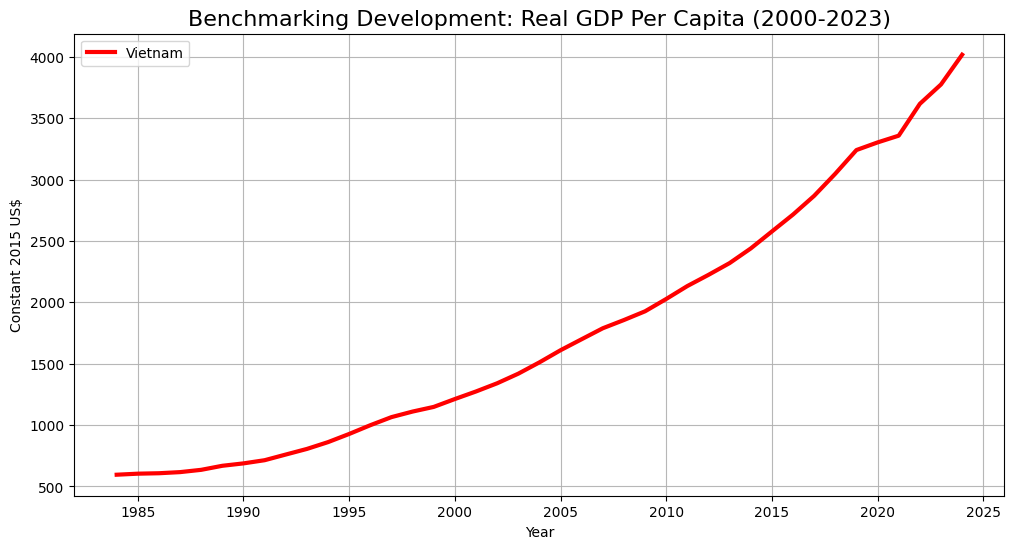

In [109]:
plt.figure(figsize=(12, 6))
# Plot ONLY Vietnam
plt.plot(df.index, df[('VNM', 'GDP_Per_Capita_Const')], label='Vietnam', color='red', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.9)
plt.show()

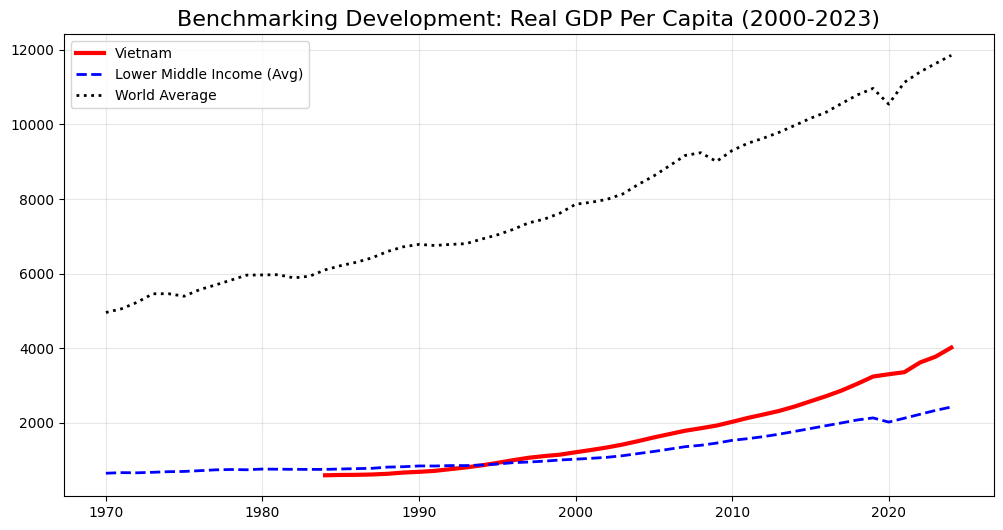

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('VNM', 'GDP_Per_Capita_Const')], label='Vietnam', color='red', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], label='Lower Middle Income (Avg)', color='Blue', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='black', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

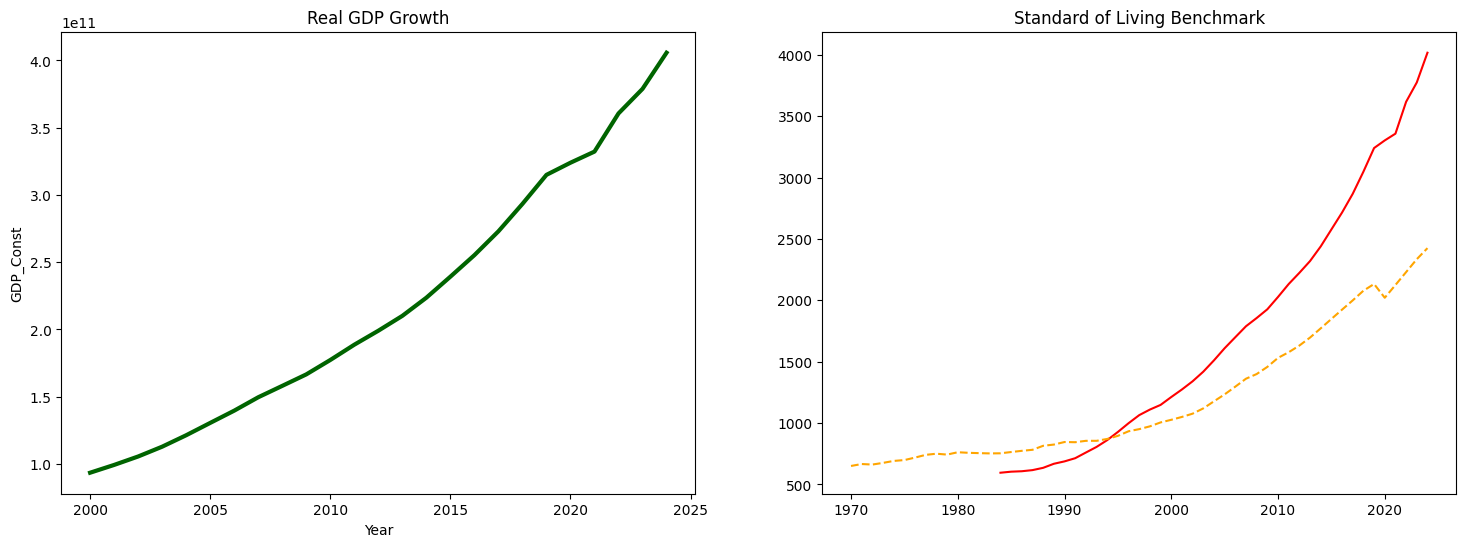

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('VNM', 'GDP_Per_Capita_Const')], color='red')
ax2.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

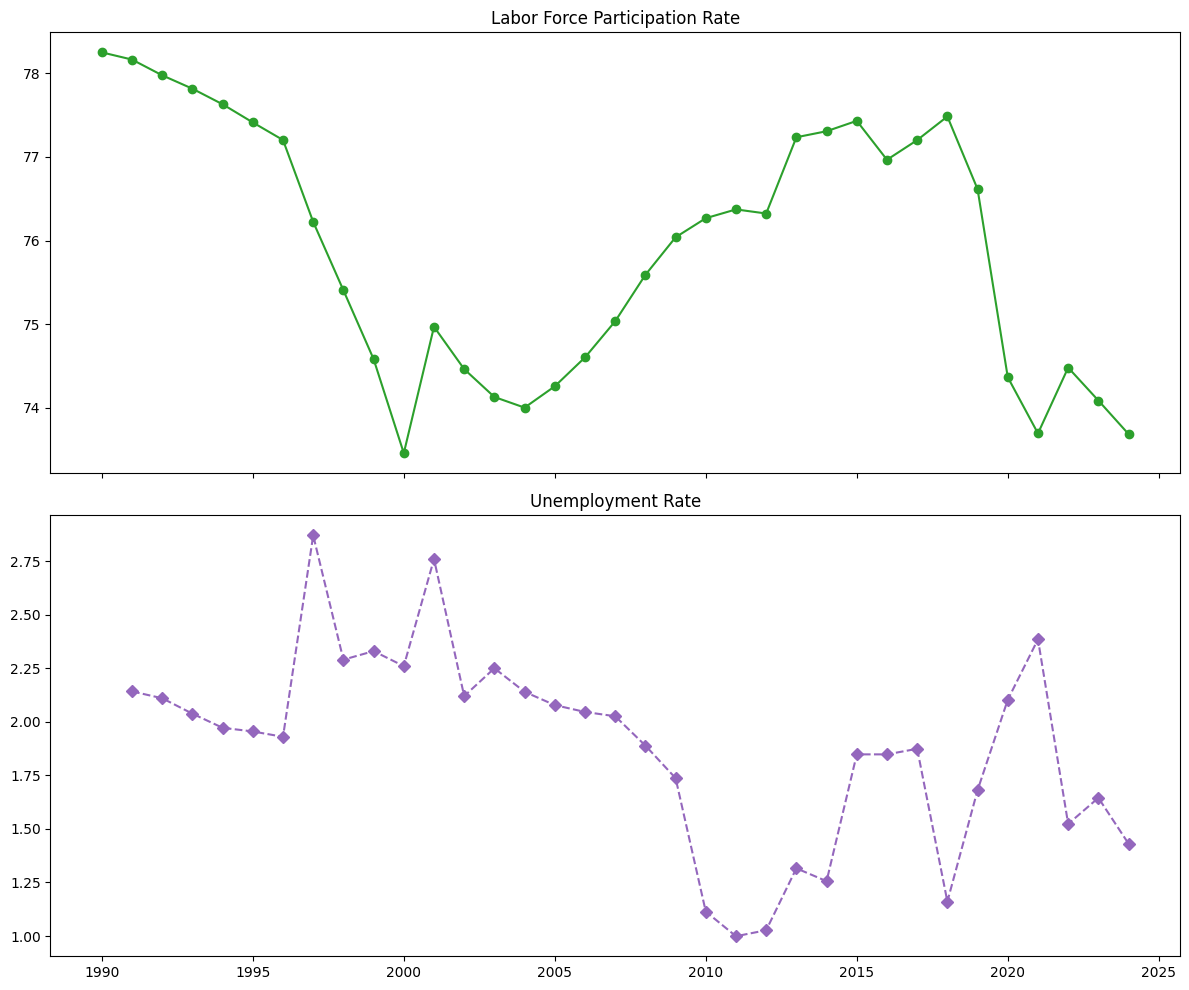

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_vnm.index, df_vnm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_vnm.index, df_vnm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()


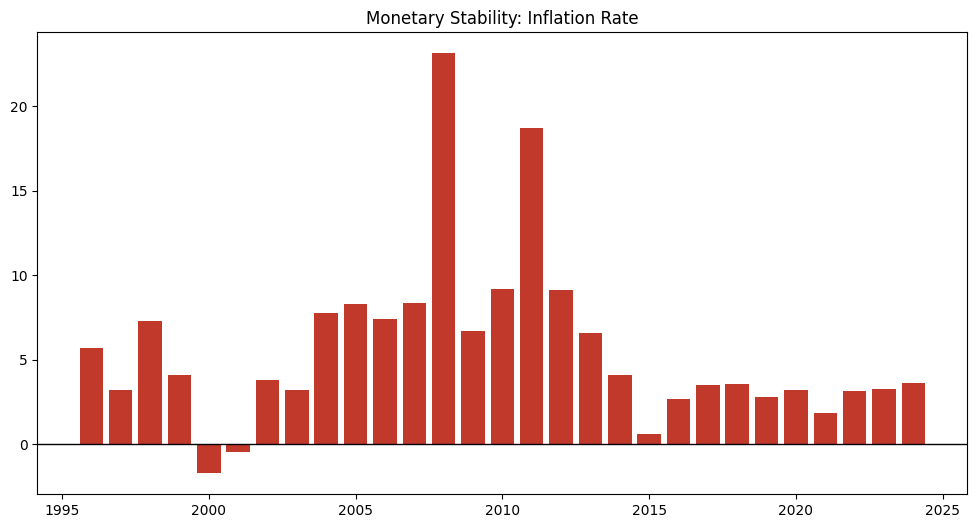

In [113]:
plt.figure(figsize=(12, 6))

plt.bar(df_vnm.index, df_vnm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()


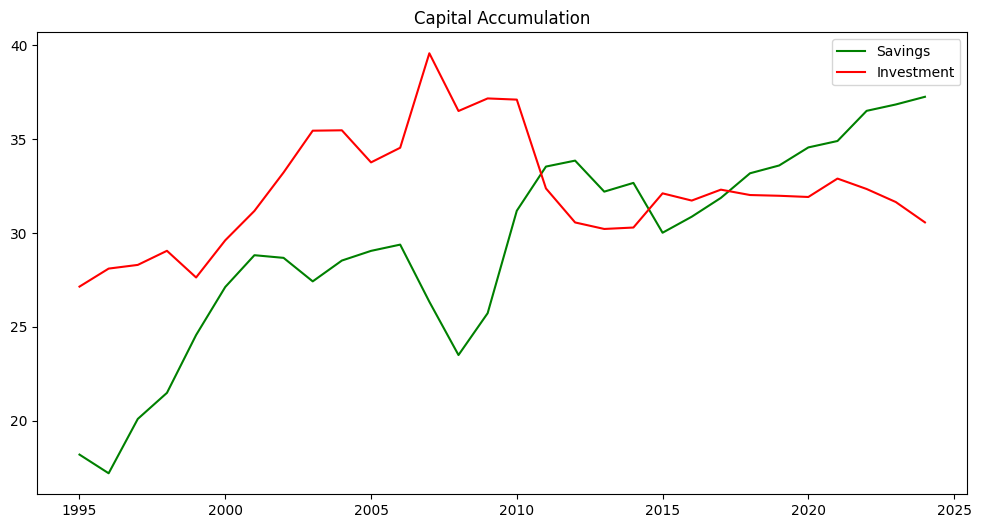

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(df_vnm.index, df_vnm['Gross_Dom_Savings'], label='Savings', color='green')
plt.plot(df_vnm.index, df_vnm['Gross_Cap_Formation'], label='Investment', color='red')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

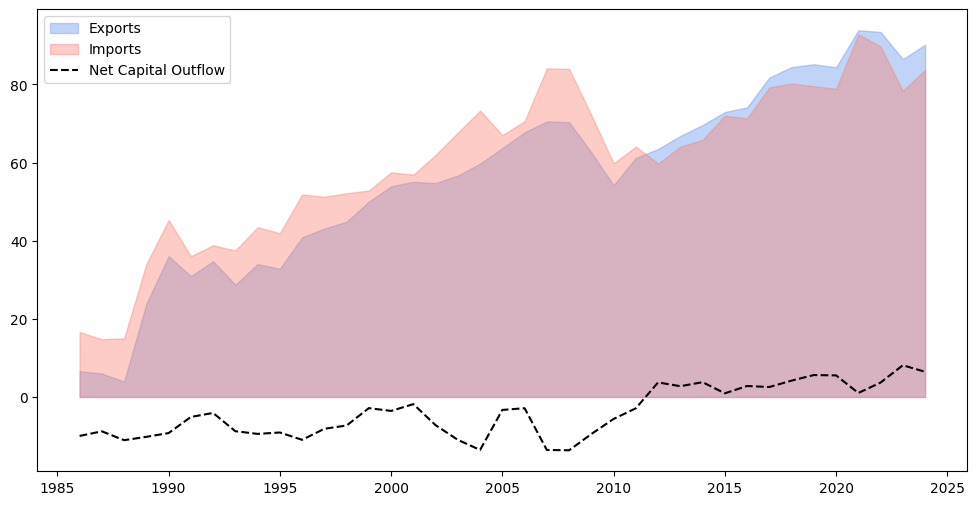

In [115]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_vnm.index, df_vnm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_vnm.index, df_vnm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_vnm.index, df_vnm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

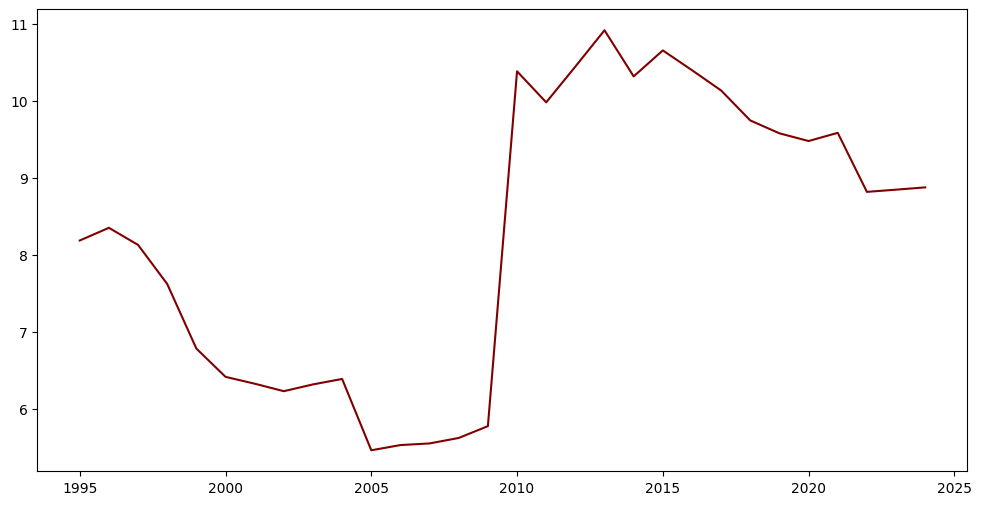

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(df_vnm.index, df_vnm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_vnm.index, df_vnm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_vnm.index, df_vnm['Tax_Rev_GDP'], df_vnm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

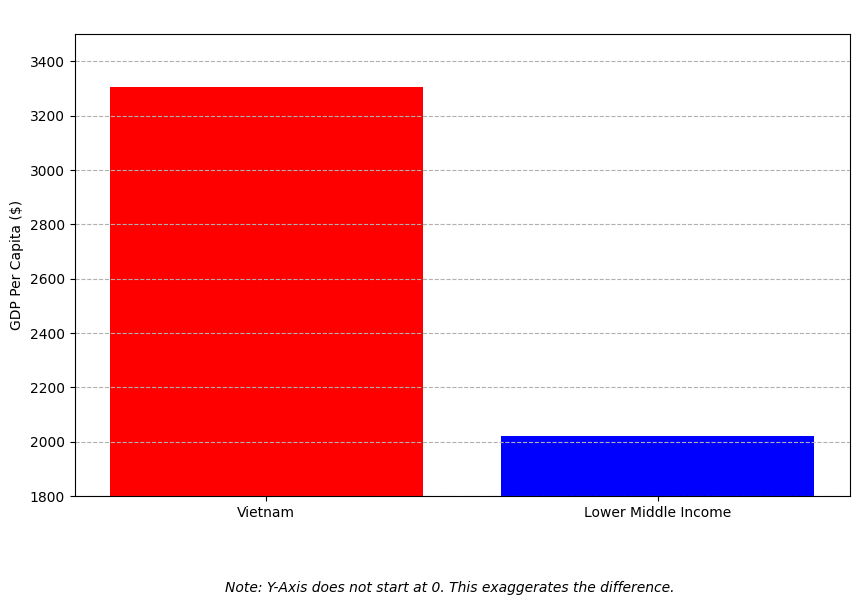

In [117]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2020
vnm_val = df.loc[snapshot_year, ('VNM', 'GDP_Per_Capita_Const')]
lmc_val = df.loc[snapshot_year, ('LMC', 'GDP_Per_Capita_Const')]

values = [vnm_val, lmc_val]
labels = ['Vietnam', 'Lower Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['red', 'blue'])

plt.ylim(1800, 3500)

plt.title('THE UGLY: Vietnam Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='white')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

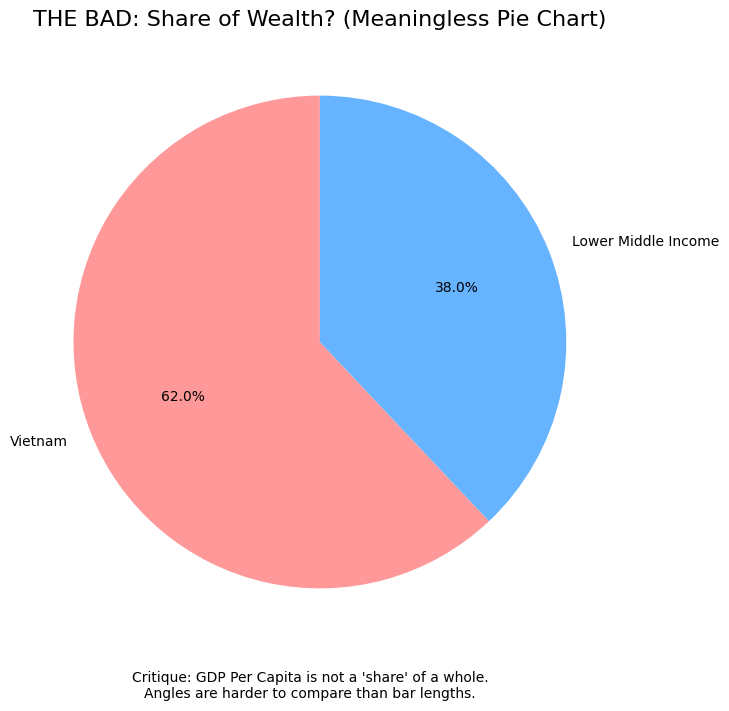

In [118]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

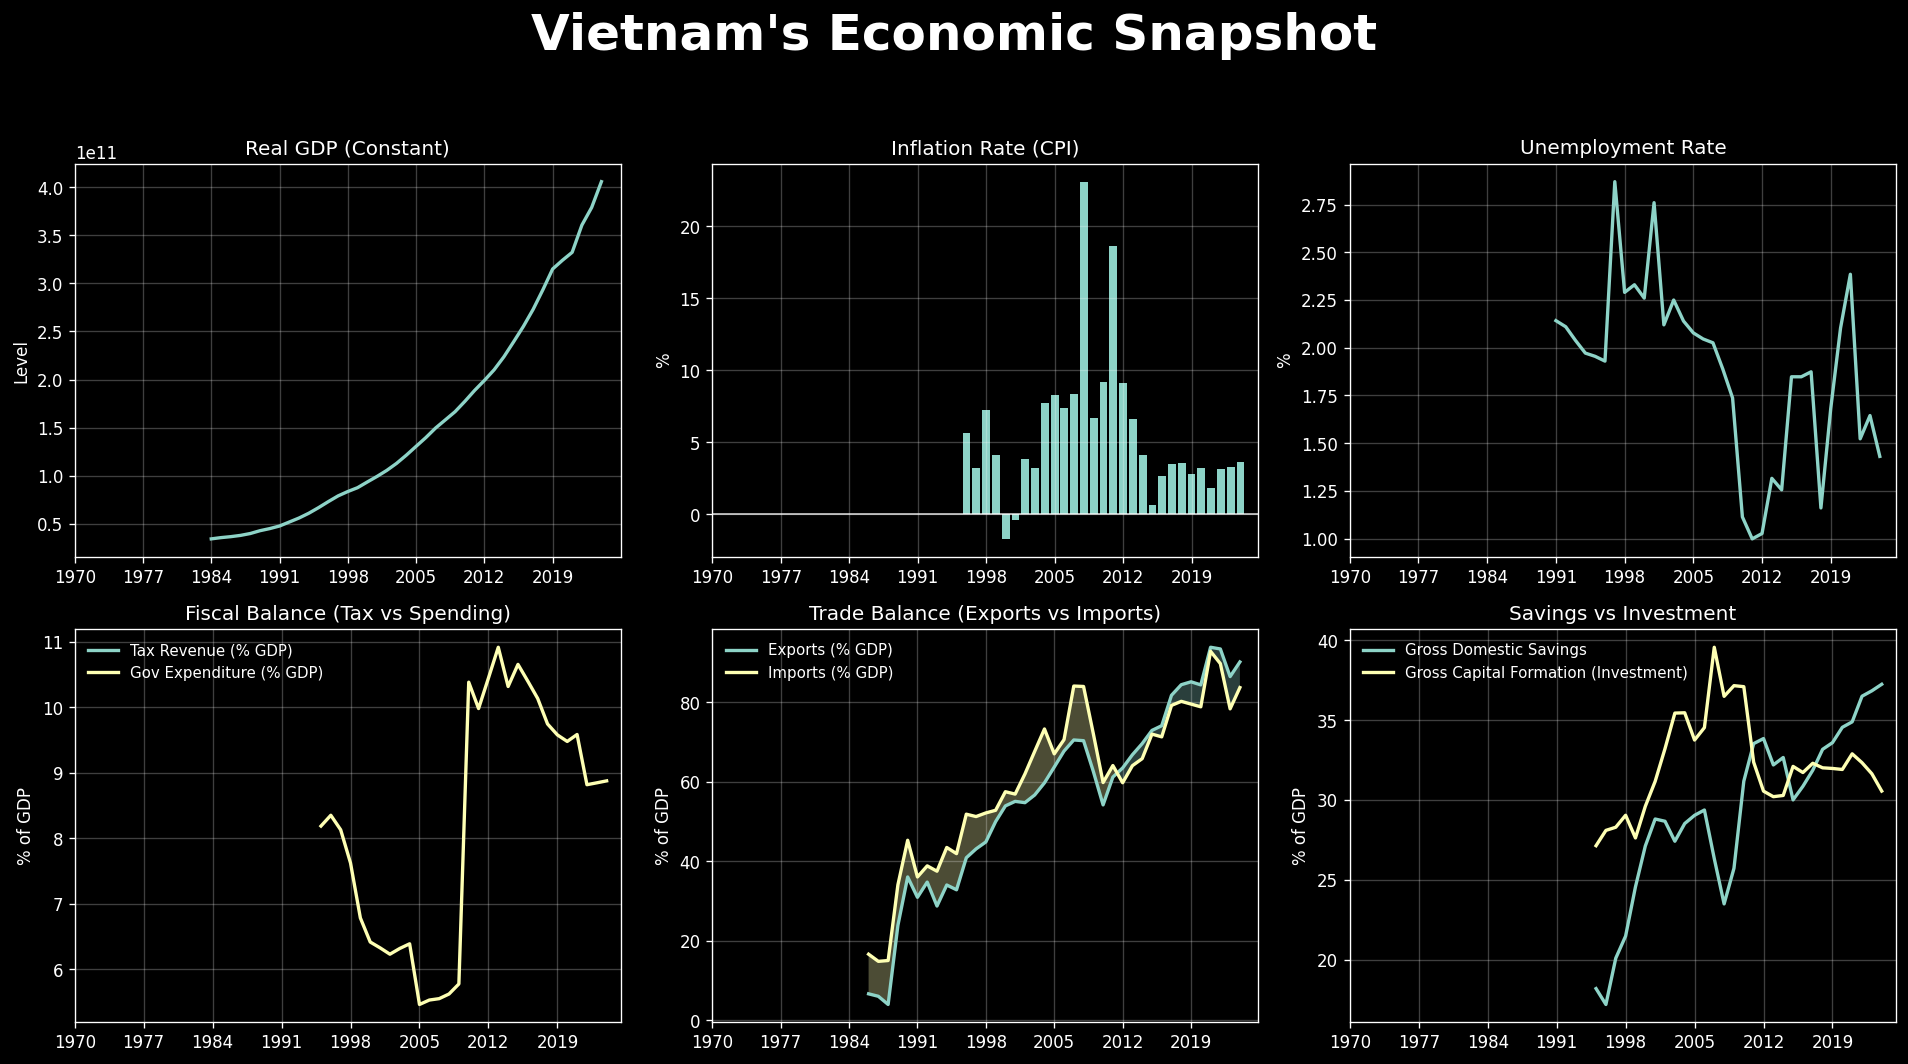

In [119]:
# --- Style ---
plt.style.use("dark_background")

# --- Prep / safety checks ---
df = df_vnm.copy()

required_cols = [
    "GDP_Const",
    "Inflation_CPI",
    "Unemployment_Rate",
    "Tax_Rev_GDP",
    "Gov_Exp_GDP",
    "Exports_GDP",
    "Imports_GDP",
    "Gross_Dom_Savings",
    "Gross_Cap_Formation",
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in df_vnm: {missing}")

# --- Build an x-axis that works whether you have a Year column or an index ---
if "Year" in df.columns:
    df = df.sort_values("Year").reset_index(drop=True)
    x_labels = df["Year"].astype(str).values
else:
    df = df.sort_index()
    if isinstance(df.index, pd.DatetimeIndex):
        x_labels = df.index.year.astype(str).values
    else:
        x_labels = df.index.astype(str).values

x = np.arange(len(df))

def format_xaxis(ax):
    # show ~6–8 ticks for readability
    n = len(x)
    step = max(1, n // 7)
    ticks = np.arange(0, n, step)
    ax.set_xticks(ticks)
    ax.set_xticklabels(x_labels[ticks], rotation=0)
    ax.grid(True, alpha=0.25)

# --- Figure layout (2x3) ---
fig, axes = plt.subplots(2, 3, figsize=(16, 9), dpi=120)
fig.suptitle("Vietnam's Economic Snapshot", fontsize=30, fontweight="bold")

# 1) Top Left: Real GDP (Line)
ax = axes[0, 0]
ax.plot(x, df["GDP_Const"], linewidth=2)
ax.set_title("Real GDP (Constant)")
ax.set_ylabel("Level")
format_xaxis(ax)

# 2) Top Middle: Inflation (Bar + 0 line)
ax = axes[0, 1]
ax.bar(x, df["Inflation_CPI"])
ax.axhline(0, linewidth=1, alpha=0.8)
ax.set_title("Inflation Rate (CPI)")
ax.set_ylabel("%")
format_xaxis(ax)

# 3) Top Right: Unemployment (Line)
ax = axes[0, 2]
ax.plot(x, df["Unemployment_Rate"], linewidth=2)
ax.set_title("Unemployment Rate")
ax.set_ylabel("%")
format_xaxis(ax)

# 4) Bottom Left: Fiscal Balance (Fill between Tax Rev & Gov Exp)
ax = axes[1, 0]
tax = df["Tax_Rev_GDP"].astype(float).values
gov = df["Gov_Exp_GDP"].astype(float).values

ax.plot(x, tax, linewidth=2, label="Tax Revenue (% GDP)")
ax.plot(x, gov, linewidth=2, label="Gov Expenditure (% GDP)")

ax.fill_between(x, tax, gov, where=(tax >= gov), interpolate=True, alpha=0.30)
ax.fill_between(x, tax, gov, where=(tax <  gov), interpolate=True, alpha=0.30)

ax.set_title("Fiscal Balance (Tax vs Spending)")
ax.set_ylabel("% of GDP")
ax.legend(frameon=False, fontsize=9)
format_xaxis(ax)

# 5) Bottom Middle: Trade Balance (Fill between Exports & Imports)
ax = axes[1, 1]
exp = df["Exports_GDP"].astype(float).values
imp = df["Imports_GDP"].astype(float).values

ax.plot(x, exp, linewidth=2, label="Exports (% GDP)")
ax.plot(x, imp, linewidth=2, label="Imports (% GDP)")

ax.fill_between(x, exp, imp, where=(exp >= imp), interpolate=True, alpha=0.30)
ax.fill_between(x, exp, imp, where=(exp <  imp), interpolate=True, alpha=0.30)

ax.set_title("Trade Balance (Exports vs Imports)")
ax.set_ylabel("% of GDP")
ax.legend(frameon=False, fontsize=9)
format_xaxis(ax)

# 6) Bottom Right: Savings vs Investment (Dual lines)
ax = axes[1, 2]
ax.plot(x, df["Gross_Dom_Savings"], linewidth=2, label="Gross Domestic Savings")
ax.plot(x, df["Gross_Cap_Formation"], linewidth=2, label="Gross Capital Formation (Investment)")
ax.set_title("Savings vs Investment")
ax.set_ylabel("% of GDP")
ax.legend(frameon=False, fontsize=9)
format_xaxis(ax)

# --- Layout ---
fig.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


In [120]:
df_vnm.describe()

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
count,29.00,0.00,30.00,39.00,30.00,39.00,41.00,41.00,30.00,35.00,35.00,34.00,30.00,35.00,39.00,0.00
mean,5.61,NaN,8.23,56.24,32.22,60.15,154456452048.37,1758.78,29.30,75.91,45903111.54,1.89,1.89,3524.16,-3.91,NaN
std,5.09,NaN,1.88,24.18,3.00,20.30,109616588757.01,1020.60,5.38,1.52,8670512.60,0.46,0.37,1615.93,6.44,NaN
min,-1.71,NaN,5.47,3.95,27.14,14.80,34363462779.81,595.49,17.21,73.46,31535246.00,1.00,1.14,1428.81,-13.64,NaN
25%,3.21,NaN,6.34,38.45,30.36,48.26,61014304826.64,861.12,26.53,74.47,38086624.00,1.65,1.64,2246.86,-9.34,NaN
50%,3.83,NaN,8.59,59.73,32.00,64.05,121387725604.57,1510.94,29.70,76.22,46298960.00,1.96,1.91,3231.52,-4.09,NaN
75%,7.42,NaN,9.92,71.72,33.62,75.82,223632762207.56,2439.29,33.45,77.27,54758513.00,2.14,2.19,4515.17,2.65,NaN
max,23.12,NaN,10.92,93.85,39.57,92.83,405742875627.92,4017.75,37.25,78.25,57133476.00,2.87,2.50,7101.67,8.12,NaN


In [121]:
pd.options.display.float_format = '{:.2f}'.format
df_vnm.mean()

,0
series,
Inflation_CPI,5.61
Tax_Rev_GDP,NaN
Gov_Exp_GDP,8.23
Exports_GDP,56.24
Gross_Cap_Formation,32.22
Imports_GDP,60.15
GDP_Const,154456452048.37
GDP_Per_Capita_Const,1758.78
Gross_Dom_Savings,29.30
